<a href="https://colab.research.google.com/github/finale22/MNIST/blob/main/MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [ ]:
from tensorflow import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# 2. MNIST 시각화

In [ ]:
import random
import matplotlib.pyplot as plt

1


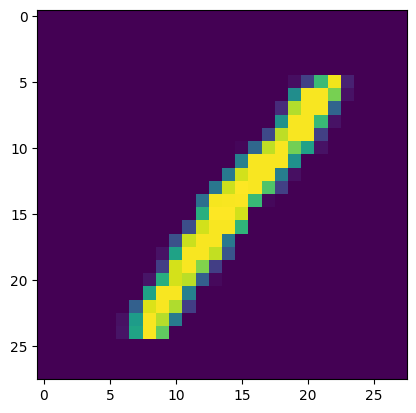

In [ ]:
id = random.randrange(0, 10000)
print(f"{test_y[id]}")
plt.imshow(test_x[id])
plt.show()

# 3. 이미지 데이터 전처리 (차원, 정규화)

In [ ]:
print(train_x.shape, test_x.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
train_x.shape[0]

60000

In [ ]:
# CNN을 위해 이미지 데이터를 3D Tensor에서 4D Tensor로 변환 (RGB 값 추가)
# (n개, h, w, rgb)

train_n, h, w = train_x.shape
test_n = test_x.shape[0]

train_x = train_x.reshape(train_n, h, w, 1)
test_x = test_x.reshape(test_n, h, w, 1)

print(train_x.shape, test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
print(f"max = {train_x.max()}, min = {train_x.min()}")

max = 255, min = 0


In [ ]:
# 이미지가 0 ~ 255 값으로 구성되어 있음
# 0 ~ 1 범위로 정규화

max_n, min_n = train_x.max(), train_x.min()
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

print(f"max = {train_x.max()}, min = {train_x.min()}")

max = 1.0, min = 0.0


# 4. 모델링

In [ ]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.losses import sparse_categorical_crossentropy as scc

In [ ]:
_, h, w, rgb = train_x.shape

In [ ]:
clear_session()

model = Sequential()
model.add(Input(shape=(h, w, rgb)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss=scc, metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 163018 (636.79 KB)
Trainable params: 163018 (636.79 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [ ]:
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=1, verbose=1, callbacks=[es])

1500/1500 [==============================] - 271s 181ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0468 - val_accuracy: 0.9864


# 5. 평가

In [ ]:
performance_test = model.evaluate(test_x, test_y, batch_size=10)
print(f"test loss = {performance_test[0]:.6f}, test accuracy = {performance_test[1]:.2f}")

1000/1000 [==============================] - 17s 17ms/step - loss: 0.0370 - accuracy: 0.9880
test loss = 0.037038, test accuracy = 0.99


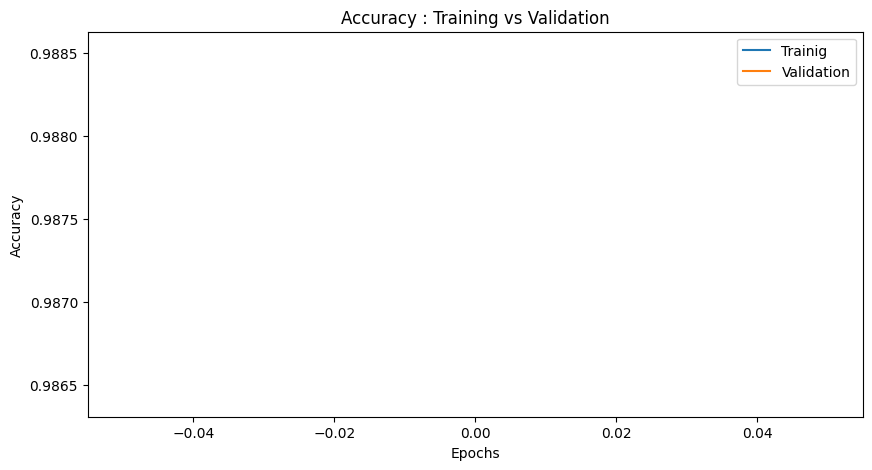

In [ ]:
history = hist.history
plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 예측값 생성
from sklearn.metrics import accuracy_score

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)
train_single_pred = train_pred.argmax(axis=1)
test_single_pred = test_pred.argmax(axis=1)
logi_train_acc = accuracy_score(train_y, train_single_pred)
logi_test_acc = accuracy_score(test_y, test_single_pred)
print('CNN')
print(f"Train Accuracy: {logi_train_acc:.2f}")
print(f"Test Accuracy: {logi_test_acc:.2f}")


313/313 [==============================] - 15s 48ms/step
CNN
Train Accuracy: 0.99
Test Accuracy: 0.99


정답: 6
예측: 6


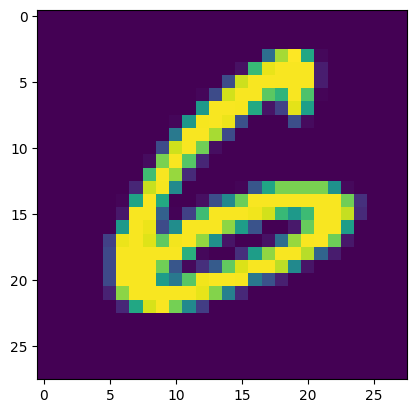

In [ ]:
id = random.randrange(0, 10000)
print(f"정답: {test_y[id]}")
print(f"예측: {test_single_pred[id]}")
plt.imshow(test_x[id])
plt.show()